<a href="https://colab.research.google.com/github/laassiri571/Regression-lineaire-numpy/blob/master/Master_DL_Course1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## Ecrit par Redouane Lguensat
## pour le cours Deep Learning 

## Exercice 1

In [1]:
import numpy as np
import math

In [3]:
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [4]:
0.55*0.5+(-0.35)*0.45+0.15

0.2675

In [5]:
sigmoid(0.55*0.5+(-0.35)*0.45+0.15)

0.5664790559676278

## Exercice 2

In [6]:
import keras
from keras import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(3,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 16        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


# Tutoriel MNIST 

In [9]:
keras.__version__

'2.11.0'

In [10]:
#import tensorflow 
#from tensorflow import keras
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l1, l2
import matplotlib.pyplot as plt

charger la base de données MNIST

In [11]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [12]:
x_train.shape

(60000, 28, 28)

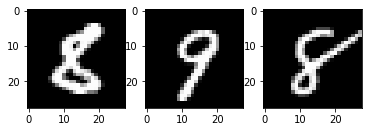

In [13]:
randindices = np.random.randint(x_train.shape[0],size=3)
plt.figure()
plt.subplot(1,3,1)
plt.imshow(x_train[randindices[0],:,:], cmap='gray')
plt.subplot(1,3,2)
plt.imshow(x_train[randindices[1],:,:], cmap='gray')
plt.subplot(1,3,3)
plt.imshow(x_train[randindices[2],:,:], cmap='gray')

In [14]:
print(y_train[randindices[0]],y_train[randindices[1]],y_train[randindices[2]])

8 9 8


In [15]:
x_train[randindices[0],:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  45, 163, 254, 254, 143,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 221, 253, 253, 253, 251,  89,   0,   0,   0,   0,
          0,   0],
       [  

In [16]:
x_test.shape #60000 images d'entraînement, 10000 images de test

(10000, 28, 28)

Aplatir les images et normalisation

In [17]:
x_train = x_train.reshape(60000, 784) # aplatir données d'entraînement
x_test = x_test.reshape(10000, 784) #aplatir données de test
x_train = x_train.astype('float32') #transformation d'int to float
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [18]:
x_train.shape

(60000, 784)

In [19]:
x_train[0,:]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [20]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

5 ->  0 0 0 0 0 1 0 0 0 0 (one hot encoding)

convertir les classes en vecteurs binaires (categorical)

In [21]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [22]:
y_train[:5,]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [23]:
x_train.shape

(60000, 784)

## entraînement d'un MLP

In [24]:
model = Sequential()
model.add(Dense(256, activation='relu',
                kernel_regularizer = l2(1e-3),
                input_shape=(784,)))
#####model.add(Dropout(0.5))
model.add(Dense(256, activation='relu',
                kernel_regularizer = l2(1e-3)))
#####model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(learning_rate=1e-3),
              metrics = ['accuracy'])

In [26]:
batch_size = 128 #en général entre 32 et 256
epochs = 50

In [27]:
60000//128 #nb de batchs

468

In [28]:
H = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/50
469/469 [==============================] - 8s 5ms/step - loss: 0.5961 - accuracy: 0.9225 - val_loss: 0.3637 - val_accuracy: 0.9583
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 0.3059 - accuracy: 0.9617 - val_loss: 0.2490 - val_accuracy: 0.9675
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 0.2303 - accuracy: 0.9692 - val_loss: 0.2084 - val_accuracy: 0.9732
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1990 - accuracy: 0.9726 - val_loss: 0.2069 - val_accuracy: 0.9653
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1811 - accuracy: 0.9757 - val_loss: 0.1782 - val_accuracy: 0.9745
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1734 - accuracy: 0.9754 - val_loss: 0.1696 - val_accuracy: 0.9755
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1607 - accuracy: 0.9783 - val_loss: 0.1800 - val_accuracy: 0.9701
Epoch 

Text(0, 0.5, 'categorical cross entropy')

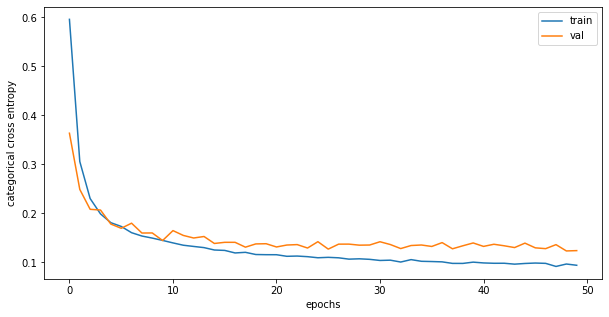

In [29]:
plt.figure(figsize=(10,5))
plt.plot(H.history['loss'], label='train')
plt.plot(H.history['val_loss'], label='val')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('categorical cross entropy')

Text(0, 0.5, 'accuracy')

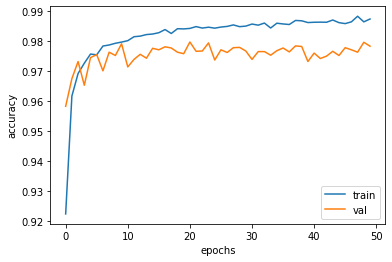

In [30]:
plt.plot(H.history['accuracy'], label='train')
plt.plot(H.history['val_accuracy'], label='val')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')

score sur toute la base de données de test

In [31]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.12405473738908768
Test accuracy: 0.9782999753952026


regardons le résultat sur quelques images de test

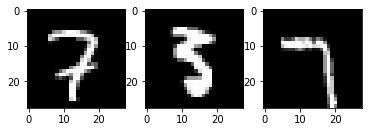

In [32]:
randindices=np.random.randint(x_test.shape[0],size=3)
plt.figure()
plt.subplot(1,3,1)
plt.imshow(np.reshape(x_test[randindices[0],:],(28,28)), cmap='gray')
plt.subplot(1,3,2)
plt.imshow(np.reshape(x_test[randindices[1],:],(28,28)), cmap='gray')
plt.subplot(1,3,3)
plt.imshow(np.reshape(x_test[randindices[2],:],(28,28)), cmap='gray')

In [33]:
predictions = model.predict(x_test)
print("Le réseau reconnaît le chiffre "+ str(np.argmax(predictions[randindices[0],:])) + ' avec une confiance ' + str(np.max(predictions[randindices[0],:]) * 100) + '%.')
print("Le réseau reconnaît le chiffre "+ str(np.argmax(predictions[randindices[1],:])) + ' avec une confiance ' + str(np.max(predictions[randindices[1],:]) * 100) + '%.')
print("Le réseau reconnaît le chiffre "+ str(np.argmax(predictions[randindices[2],:])) + ' avec une confiance ' + str(np.max(predictions[randindices[2],:]) * 100) + '%.')

313/313 [==============================] - 1s 2ms/step
Le réseau reconnaît le chiffre 7 avec une confiance 99.57461953163147%.
Le réseau reconnaît le chiffre 5 avec une confiance 89.22934532165527%.
Le réseau reconnaît le chiffre 7 avec une confiance 99.99314546585083%.
